<a href="https://colab.research.google.com/github/Henil21/University-Research/blob/main/itm_brain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
Brain_train='/content/drive/MyDrive/Brain_multiclass/Training/'
Brain_test='/content/drive/MyDrive/Brain_multiclass/Testing/'

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import random
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir,target_class):

   # getting class vise dir link
   target=target_dir+target_class

   # taking 1 random image from a list of all images under a class
   random_img=random.sample(os.listdir(target),1)

   #as we have stored it in list we need to access it through index which is zero
   image=mpimg.imread(target+'/'+random_img[0])

   fig = plt.figure(figsize=(5, 2))  # Set the width and height of the figure


   #plotting image
   plt.imshow(image)

   plt.axis("off")
   print(f"img shape:{image.shape}")

img shape:(315, 315, 3)


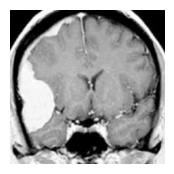

In [23]:
view_random_image(target_dir=Brain_train,target_class='meningioma')

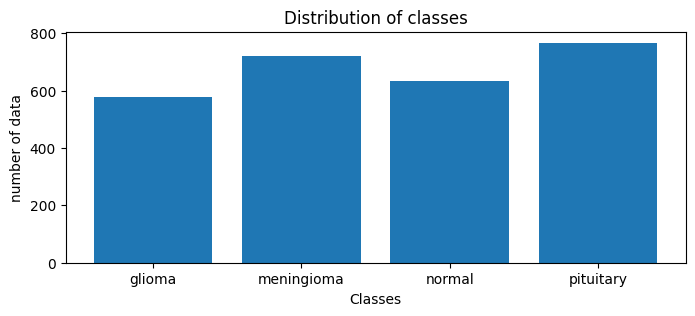

In [24]:

# getting length of the sub classes
gol=len(os.listdir('/content/drive/MyDrive/Brain_multiclass/Training/glioma'))
men=len(os.listdir('/content/drive/MyDrive/Brain_multiclass/Training/meningioma'))
Normal=len(os.listdir('/content/drive/MyDrive/Brain_multiclass/Training/notumor'))
pit=len(os.listdir('/content/drive/MyDrive/Brain_multiclass/Training/pituitary'))

classes=['glioma', "meningioma",'normal','pituitary']
values=[gol,men,Normal,pit]

fig = plt.figure(figsize=(8, 3))  # Set the width and height of the figure

plt.bar(classes,values)

# Adding title to the plot
plt.title("Distribution of classes")

# Adding label on the y-axis
plt.ylabel('number of data')

# Adding label on the x-axis
plt.xlabel('Classes')

plt.show()

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator




# recaling pixels
train_data_gen = ImageDataGenerator(rescale=1./255)

# dividing into batches and
train_generator_brain = train_data_gen.flow_from_directory(
    Brain_train,
    target_size=(224, 224), #targeted shape
    batch_size=32, #32  images per batch
     shuffle=True,
     seed=42,
    class_mode='categorical' ,# we are working with multiclass problem
     #shuffle=True
)


# recaling pixels
test_data_gen_brain = ImageDataGenerator(rescale=1./255)

# dividing into batches and
test_generator_brain = train_data_gen.flow_from_directory(
    Brain_test,
    seed=42,
    shuffle=True,
    target_size=(224, 224), #targeted shape
    batch_size=32, #32  images per batch
    class_mode='categorical', # we are working with multiclass problem
     #shuffle=True
)

Found 2696 images belonging to 4 classes.
Found 1316 images belonging to 4 classes.


In [26]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D, Activation
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras import Sequential
tf.random.set_seed(42)

Model_2=Sequential([
    Conv2D(500,3,activation='relu', input_shape=(224,224,3)),  #3 is kernal size
    MaxPool2D(),
    Conv2D(250, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(250, 3, activation='relu'),
    MaxPool2D(),

    Flatten(),
    Dense(4, activation='softmax') # softmax as we are working with multiclass problem
])
Model_2.compile(loss='categorical_crossentropy', # as we got multiple classes
                            optimizer=tf.keras.optimizers.Adam(), # for now lets dont specify the learning rate,  default is 0.001 and we will also try Rmspromp
                            metrics=['accuracy'])# evaluation

history_2=Model_2.fit(train_generator_brain,
                   epochs=5,
                    steps_per_epoch=len(# dividing into batches and
                  train_generator_brain  ),
                   validation_data=(test_generator_brain),
                   validation_steps=len(test_generator_brain ))

Epoch 1/5
85/85 [==============================] - 1037s 12s/step - loss: 0.9415 - accuracy: 0.6124 - val_loss: 0.7540 - val_accuracy: 0.6809
Epoch 2/5
85/85 [==============================] - 49s 574ms/step - loss: 0.4858 - accuracy: 0.8201 - val_loss: 0.5430 - val_accuracy: 0.7956
Epoch 3/5
85/85 [==============================] - 47s 557ms/step - loss: 0.3292 - accuracy: 0.8754 - val_loss: 0.6507 - val_accuracy: 0.7416
Epoch 4/5
85/85 [==============================] - 48s 562ms/step - loss: 0.2218 - accuracy: 0.9228 - val_loss: 0.4410 - val_accuracy: 0.8739
Epoch 5/5
85/85 [==============================] - 48s 568ms/step - loss: 0.1272 - accuracy: 0.9566 - val_loss: 0.4172 - val_accuracy: 0.8837


In [27]:
model_3=Sequential([
    Conv2D(500,3,activation='relu', input_shape=(224,224,3)),  #3 is kernal size
    MaxPool2D(),
    Conv2D(250, 3, activation='relu'),
    MaxPool2D(),
     Conv2D(250, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(4, activation='softmax') # softmax as we are working with multiclass problem
])
# we clone the above model  architecture
model_3.compile(loss='categorical_crossentropy', # as we got multiple classes
                            optimizer=tf.keras.optimizers.RMSprop(), # for now lets dont specify the learning rate,  default is 0.001 and we will also try Rmspromp
                            metrics=['accuracy'])# evaluation

history_3=Model_2.fit(train_generator_brain,
                   epochs=5,
                    steps_per_epoch=len(# dividing into batches and
                  train_generator_brain  ),
                   validation_data=(test_generator_brain),
                   validation_steps=len(test_generator_brain ))

Epoch 1/5
85/85 [==============================] - 48s 563ms/step - loss: 0.0796 - accuracy: 0.9703 - val_loss: 0.4372 - val_accuracy: 0.8731
Epoch 2/5
85/85 [==============================] - 48s 567ms/step - loss: 0.0892 - accuracy: 0.9703 - val_loss: 0.5892 - val_accuracy: 0.8685
Epoch 3/5
85/85 [==============================] - 47s 554ms/step - loss: 0.0318 - accuracy: 0.9900 - val_loss: 0.6685 - val_accuracy: 0.8746
Epoch 4/5
85/85 [==============================] - 51s 601ms/step - loss: 0.0434 - accuracy: 0.9870 - val_loss: 0.5617 - val_accuracy: 0.8815
Epoch 5/5
85/85 [==============================] - 48s 559ms/step - loss: 0.0159 - accuracy: 0.9948 - val_loss: 0.6052 - val_accuracy: 0.8929
